# Fig. 9(a): Dependence of Frequency Change $\Delta f$ on Particle $M_S$

This notebook reproduces Fig. 9(a) in the paper, which shows how the frequency change $\Delta f$ of the first five eigenmodes depends on the saturation magnetisation $M_S$ of the nanoparticle, where the particle is located above the centre of the disc at separation d = 20 nm.

In [1]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd
from style_helpers import style_cycle

%matplotlib inline
plt.style.use('style_sheets/custom_style.mplstyle')

Read the data frame containing the eigenmode data and filter out the parameter values relevant for this plot.

In [2]:
df = pd.read_pickle('../data/eigenmode_info_data_frame.pickle')
df = df.query('(has_particle == True) and (x == 0) and (y == 0) and '
              '(d == 20) and (Hz == 8e4) and (d_particle == 20)')
df = df.sort_values('Ms_particle')

In [3]:
def plot_freq_vs_particle_Ms_for_mode(ax, N, df, **mpl_kwargs):
    """
    Plot dependence of `delta_f` on particle Ms for the given mode `N`.
    """
    df_filtered = df.query('N == {N}'.format(N=N)).sort_values('Hz')

    Hz_vals = df_filtered['Ms_particle'] * 1e-3  # Ms in kA/m
    freq_vals = df_filtered['freq_diff'] * 1e3   # frequency change in MHz
    ax.plot(Hz_vals, freq_vals, label='N={N}'.format(N=N), **mpl_kwargs)

Produce the plot for Fig. 9(a).

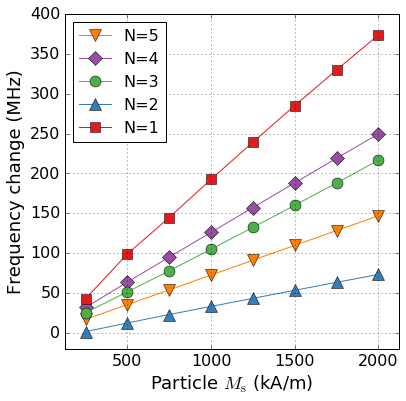

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))

for N, style_kwargs in reversed(list(zip([1, 2, 3, 4, 5], style_cycle))):
    plot_freq_vs_particle_Ms_for_mode(ax, N, df, **style_kwargs)

ax.set_xlim(125, 2125)
ax.set_ylim(-20, 400)
ax.set_xlabel(r'Particle $M_{\mathrm{s}}$ (kA/m)')
ax.set_ylabel('Frequency change (MHz)')
ax.legend(numpoints=1, loc='upper left')
ax.grid()